<a href="https://colab.research.google.com/github/Moe360lp/Moe360lp/blob/main/MLII_01_KMeans_Implementation_PRACTICA1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Implementation
Trabajo práctico 1

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image

In [19]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

In [20]:
def generate_data():
    n_clusters = 3
    points_per_cluster = 400
    means = np.array([[1, 1],
                      [5, 5],
                      [1, 10]])
    
    data = np.zeros((n_clusters * points_per_cluster, 2))

    for i in range(n_clusters):
        data[i * points_per_cluster:i * points_per_cluster + points_per_cluster] =\
            np.random.normal(loc=means[i], scale=0.5, size=(points_per_cluster, 2))

    return data

In [21]:
X = generate_data()
X

array([[ 0.87194185,  1.0469689 ],
       [ 1.36437494,  0.56652633],
       [ 0.86124304,  1.60688659],
       ...,
       [ 0.56935279, 10.30030983],
       [ 1.00745536, 10.00480344],
       [ 1.70979011, 10.31490696]])

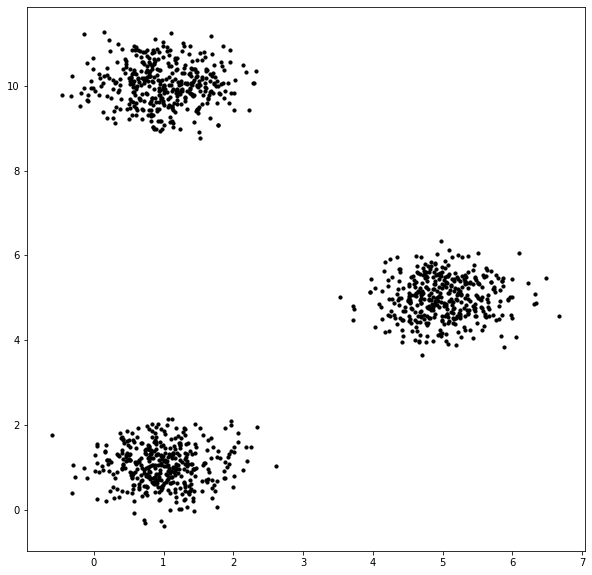

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], s=10, c='black')

In [23]:
np.random.RandomState(42)

RandomState(MT19937) at 0x7F64349FA270

Realizar la implementación de KMeans en la siguiente función. Luego, realizar la validación y entrenamiento correspondiente de tal manera que cada nube de puntos se muestre con un color diferente.

In [24]:
#def train_kmeans(X, n_clusters):
# Realizar la implementación de k-means
def train_kmeans(X, n_clusters, rseed=2):
    
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        
        labels = pairwise_distances_argmin(X, centers)
        
        
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [27]:
labels=train_kmeans(X,3)
labels

(array([[ 0.9955965 , 10.03181451],
        [ 5.00859006,  4.9968926 ],
        [ 0.97911332,  1.04446746]]), array([2, 2, 2, ..., 0, 0, 0]))